In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
from scipy import stats
#import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
filedir = '/glade/derecho/scratch/brendanc/GGCMI_CO2'
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/protein'

C370 = xr.open_dataset(filedir + '/240826.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_ConCO2.370ppm.2016-2021.clm2.h2.CYIELD.2016-2022.nc')
N370 = xr.open_dataset(filedir + '/240826.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_ConCO2.370ppm.2016-2021.clm2.h2.NYIELD.2016-2022.nc')

C570 = xr.open_dataset(filedir + '/240826.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_ConCO2.570ppm.2016-2021.clm2.h2.CYIELD.2016-2022.nc')
N570 = xr.open_dataset(filedir + '/240826.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_ConCO2.570ppm.2016-2021.clm2.h2.NYIELD.2016-2022.nc')

In [3]:
wheatarea = C370['area'].sel(crops=9)
wheatarea = wheatarea.mean(dim='time')
LatIndexer, LonIndexer = 'lat', 'lon'

wheat_c370 = C370['yield'].sel(crops=9)
#wheat_c370 = wheat_c370.where(wheatarea > 500)
#wheat_c370 = wheat_c370.mean(dim='time')
wheat_c370 = wheat_c370.loc[{LatIndexer: slice(-50, -12),
                      LonIndexer: slice(110, 155)}]
#wheat_c370 = (wheat_c370 * wheatarea)
#wheat_c370 = wheat_c370.sum(dim=['lat','lon'],skipna=True)

wheat_n370 = N370['yield'].sel(crops=9)
#wheat_n370 = wheat_n370.where(wheatarea > 500)
#wheat_n370 = wheat_n370.mean(dim='time')
wheat_n370 = wheat_n370.loc[{LatIndexer: slice(-50, -12),
                      LonIndexer: slice(110, 155)}]
#wheat_n370 = (wheat_n370 * wheatarea)
#wheat_n370 = wheat_n370.sum(dim=['lat','lon'],skipna=True)

wheat_c570 = C570['yield'].sel(crops=9)
#wheat_c570 = wheat_c570.where(wheatarea > 500)
#wheat_c570 = wheat_c570.mean(dim='time')
wheat_c570 = wheat_c570.loc[{LatIndexer: slice(-50, -12),
                      LonIndexer: slice(110, 155)}]
#wheat_c570 = (wheat_c570 * wheatarea)
#wheat_c570 = wheat_c570.sum(dim=['lat','lon'],skipna=True)

wheat_n570 = N570['yield'].sel(crops=9)
#wheat_n570 = wheat_n570.where(wheatarea > 500)
#wheat_n570 = wheat_n570.mean(dim='time')
wheat_n570 = wheat_n570.loc[{LatIndexer: slice(-50, -12),
                      LonIndexer: slice(110, 155)}]
#wheat_n570 = (wheat_n570 * wheatarea)
#wheat_n570 = wheat_n570.sum(dim=['lat','lon'],skipna=True)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
wheat370 = np.divide(wheat_n370, wheat_c370, out=np.zeros_like(wheat_n370), where=wheat_c370!=0)
#wheat370 = wheat370.where(wheat370.values > 0.001) 
#wheat370 = wheat370.where(wheat370.values < 0.02) 

wheat570 = np.divide(wheat_n570, wheat_c570, out=np.zeros_like(wheat_n570), where=wheat_c570!=0)
#wheat570 = wheat570.where(wheat570.values > 0.001) 
#wheat570 = wheat570.where(wheat570.values < 0.02) 

In [5]:
#wheat370_mean = masked_average(wheat370, dim=['lat','lon'], weights=wheatarea)
wheat370_mean = wheat370.mean(dim=['lat','lon'])
#wheat570_mean = masked_average(wheat570, dim=['lat','lon'], weights=wheatarea)
wheat570_mean = wheat570.mean(dim=['lat','lon'])

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
wheat_pchange = (wheat570_mean - wheat370_mean) / (wheat370_mean)
wheat_pchange = wheat_pchange * 100

wheat_pchange_std = np.std(wheat_pchange)

wheat_pchange_mean = wheat_pchange.mean()

In [7]:
wheat_pchange_std

<xarray.DataArray 'yield' ()>
array(3.045283)
Coordinates:
    crops    float64 9.0

In [8]:
wheat_pchange_mean

<xarray.DataArray 'yield' ()>
array(-12.883727)
Coordinates:
    crops    float64 9.0

In [9]:
wheatarea = C370['area'].sel(crops=3)
wheatarea = wheatarea.mean(dim='time')
LatIndexer, LonIndexer = 'lat', 'lon'

wheat_c370 = C370['yield'].sel(crops=3)
#wheat_c370 = wheat_c370.where(wheatarea > 500)
#wheat_c370 = wheat_c370.mean(dim='time')
wheat_c370 = wheat_c370.loc[{LatIndexer: slice(30, 42),
                      LonIndexer: slice(130, 145)}]
#wheat_c370 = (wheat_c370 * wheatarea)
#wheat_c370 = wheat_c370.sum(dim=['lat','lon'],skipna=True)

wheat_n370 = N370['yield'].sel(crops=3)
#wheat_n370 = wheat_n370.where(wheatarea > 500)
#wheat_n370 = wheat_n370.mean(dim='time')
wheat_n370 = wheat_n370.loc[{LatIndexer: slice(30, 42),
                      LonIndexer: slice(130, 145)}]
#wheat_n370 = (wheat_n370 * wheatarea)
#wheat_n370 = wheat_n370.sum(dim=['lat','lon'],skipna=True)

wheat_c570 = C570['yield'].sel(crops=3)
#wheat_c570 = wheat_c570.where(wheatarea > 500)
#wheat_c570 = wheat_c570.mean(dim='time')
wheat_c570 = wheat_c570.loc[{LatIndexer: slice(30, 42),
                      LonIndexer: slice(130, 145)}]
#wheat_c570 = (wheat_c570 * wheatarea)
#wheat_c570 = wheat_c570.sum(dim=['lat','lon'],skipna=True)

wheat_n570 = N570['yield'].sel(crops=3)
#wheat_n570 = wheat_n570.where(wheatarea > 500)
#wheat_n570 = wheat_n570.mean(dim='time')
wheat_n570 = wheat_n570.loc[{LatIndexer: slice(30, 42),
                      LonIndexer: slice(130, 145)}]
#wheat_n570 = (wheat_n570 * wheatarea)
#wheat_n570 = wheat_n570.sum(dim=['lat','lon'],skipna=True)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [10]:
wheat370 = np.divide(wheat_n370, wheat_c370, out=np.zeros_like(wheat_n370), where=wheat_c370!=0)
#wheat370 = wheat370.where(wheat370.values > 0.001) 
#wheat370 = wheat370.where(wheat370.values < 0.02) 

wheat570 = np.divide(wheat_n570, wheat_c570, out=np.zeros_like(wheat_n570), where=wheat_c570!=0)
#wheat570 = wheat570.where(wheat570.values > 0.001) 
#wheat570 = wheat570.where(wheat570.values < 0.02) 

In [11]:
#wheat370_mean = masked_average(wheat370, dim=['lat','lon'], weights=wheatarea)
wheat370_mean = wheat370.mean(dim=['lat','lon'])
#wheat570_mean = masked_average(wheat570, dim=['lat','lon'], weights=wheatarea)
wheat570_mean = wheat570.mean(dim=['lat','lon'])

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
wheat_pchange = (wheat570_mean - wheat370_mean) / (wheat370_mean)
wheat_pchange = wheat_pchange * 100

rice_pchange_std = np.std(wheat_pchange)

rice_pchange_mean = wheat_pchange.mean()

In [13]:
rice_pchange_std

<xarray.DataArray 'yield' ()>
array(2.116276)
Coordinates:
    crops    float64 3.0

In [14]:
rice_pchange_mean

<xarray.DataArray 'yield' ()>
array(-30.08149)
Coordinates:
    crops    float64 3.0

In [15]:
wheatarea = C370['area'].sel(crops=6)
wheatarea = wheatarea.mean(dim='time')
LatIndexer, LonIndexer = 'lat', 'lon'

wheat_c370 = C370['yield'].sel(crops=6)
#wheat_c370 = wheat_c370.where(wheatarea > 500)
#wheat_c370 = wheat_c370.mean(dim='time')
wheat_c370 = wheat_c370.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_c370 = (wheat_c370 * wheatarea)
#wheat_c370 = wheat_c370.sum(dim=['lat','lon'],skipna=True)

wheat_n370 = N370['yield'].sel(crops=6)
#wheat_n370 = wheat_n370.where(wheatarea > 500)
#wheat_n370 = wheat_n370.mean(dim='time')
wheat_n370 = wheat_n370.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_n370 = (wheat_n370 * wheatarea)
#wheat_n370 = wheat_n370.sum(dim=['lat','lon'],skipna=True)

wheat_c570 = C570['yield'].sel(crops=6)
#wheat_c570 = wheat_c570.where(wheatarea > 500)
#wheat_c570 = wheat_c570.mean(dim='time')
wheat_c570 = wheat_c570.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_c570 = (wheat_c570 * wheatarea)
#wheat_c570 = wheat_c570.sum(dim=['lat','lon'],skipna=True)

wheat_n570 = N570['yield'].sel(crops=6)
#wheat_n570 = wheat_n570.where(wheatarea > 500)
#wheat_n570 = wheat_n570.mean(dim='time')
wheat_n570 = wheat_n570.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_n570 = (wheat_n570 * wheatarea)
#wheat_n570 = wheat_n570.sum(dim=['lat','lon'],skipna=True)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [16]:
wheat370 = np.divide(wheat_n370, wheat_c370, out=np.zeros_like(wheat_n370), where=wheat_c370!=0)
#wheat370 = wheat370.where(wheat370.values > 0.001) 
#wheat370 = wheat370.where(wheat370.values < 0.02) 

wheat570 = np.divide(wheat_n570, wheat_c570, out=np.zeros_like(wheat_n570), where=wheat_c570!=0)
#wheat570 = wheat570.where(wheat570.values > 0.001) 
#wheat570 = wheat570.where(wheat570.values < 0.02) 

In [17]:
#wheat370_mean = masked_average(wheat370, dim=['lat','lon'], weights=wheatarea)
wheat370_mean = wheat370.mean(dim=['lat','lon'])
#wheat570_mean = masked_average(wheat570, dim=['lat','lon'], weights=wheatarea)
wheat570_mean = wheat570.mean(dim=['lat','lon'])

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [18]:
wheat_pchange = (wheat570_mean - wheat370_mean) / (wheat370_mean)
wheat_pchange = wheat_pchange * 100

soy_pchange_std = np.std(wheat_pchange)

soy_pchange_mean = wheat_pchange.mean()

In [19]:
soy_pchange_std

<xarray.DataArray 'yield' ()>
array(1.269742)
Coordinates:
    crops    float64 6.0

In [20]:
soy_pchange_mean

<xarray.DataArray 'yield' ()>
array(1.824404)
Coordinates:
    crops    float64 6.0

In [21]:
wheatarea = C370['area'].sel(crops=0)
wheatarea = wheatarea.mean(dim='time')
LatIndexer, LonIndexer = 'lat', 'lon'

wheat_c370 = C370['yield'].sel(crops=0)
#wheat_c370 = wheat_c370.where(wheatarea > 500)
#wheat_c370 = wheat_c370.mean(dim='time')
wheat_c370 = wheat_c370.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_c370 = (wheat_c370 * wheatarea)
#wheat_c370 = wheat_c370.sum(dim=['lat','lon'],skipna=True)

wheat_n370 = N370['yield'].sel(crops=0)
#wheat_n370 = wheat_n370.where(wheatarea > 500)
#wheat_n370 = wheat_n370.mean(dim='time')
wheat_n370 = wheat_n370.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_n370 = (wheat_n370 * wheatarea)
#wheat_n370 = wheat_n370.sum(dim=['lat','lon'],skipna=True)

wheat_c570 = C570['yield'].sel(crops=0)
#wheat_c570 = wheat_c570.where(wheatarea > 500)
#wheat_c570 = wheat_c570.mean(dim='time')
wheat_c570 = wheat_c570.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_c570 = (wheat_c570 * wheatarea)
#wheat_c570 = wheat_c570.sum(dim=['lat','lon'],skipna=True)

wheat_n570 = N570['yield'].sel(crops=0)
#wheat_n570 = wheat_n570.where(wheatarea > 500)
#wheat_n570 = wheat_n570.mean(dim='time')
wheat_n570 = wheat_n570.loc[{LatIndexer: slice(25, 47),
                      LonIndexer: slice(220, 300)}]
#wheat_n570 = (wheat_n570 * wheatarea)
#wheat_n570 = wheat_n570.sum(dim=['lat','lon'],skipna=True)

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [22]:
wheat370 = np.divide(wheat_n370, wheat_c370, out=np.zeros_like(wheat_n370), where=wheat_c370!=0)
#wheat370 = wheat370.where(wheat370.values > 0.001) 
#wheat370 = wheat370.where(wheat370.values < 0.02) 

wheat570 = np.divide(wheat_n570, wheat_c570, out=np.zeros_like(wheat_n570), where=wheat_c570!=0)
#wheat570 = wheat570.where(wheat570.values > 0.001) 
#wheat570 = wheat570.where(wheat570.values < 0.02) 

In [23]:
#wheat370_mean = masked_average(wheat370, dim=['lat','lon'], weights=wheatarea)
wheat370_mean = wheat370.mean(dim=['lat','lon'])
#wheat570_mean = masked_average(wheat570, dim=['lat','lon'], weights=wheatarea)
wheat570_mean = wheat570.mean(dim=['lat','lon'])

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [24]:
wheat_pchange = (wheat570_mean - wheat370_mean) / (wheat370_mean)
wheat_pchange = wheat_pchange * 100

maize_pchange_std = np.std(wheat_pchange)

maize_pchange_mean = wheat_pchange.mean()

In [25]:
maize_pchange_std

<xarray.DataArray 'yield' ()>
array(0.92692)
Coordinates:
    crops    float64 0.0

In [26]:
maize_pchange_mean

<xarray.DataArray 'yield' ()>
array(1.755935)
Coordinates:
    crops    float64 0.0

In [27]:
df_myers = pd.DataFrame({"id":["Wheat", "Rice", "Soybean", "Maize"], 
                   "mean":[-11.5,-13.5,-4.5,-9.3]}) 

In [28]:
df = pd.DataFrame({"id":["Wheat", "Rice", "Soybean", "Maize"], 
                   "mean":[wheat_pchange_mean,rice_pchange_mean,soy_pchange_mean,maize_pchange_mean], 
                   "sd":[3.05,2.12,1.27,0.93]})

In [29]:
N = 4
ind = np.arange(N)
barWidth = 0.2

In [30]:
clm = [wheat_pchange_mean, rice_pchange_mean, soy_pchange_mean, maize_pchange_mean]
myers = [-6.7, -8.5, 0.6, -4.5]

In [31]:
myers_min = np.array([-15.7, -18, -3.9, -18.5])
myers_max = np.array([0.3, -0.1, 4.2, 11.1])

In [32]:
myers_min = myers - myers_min
myers_max = myers_max - myers

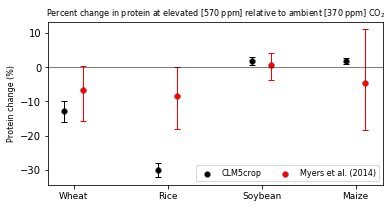

In [35]:
fig = plt.subplots(figsize =(6, 3))
#plt.grid(linewidth=0.6, zorder=0)
plt.scatter(ind, clm, color ='black',
        edgecolor ='grey', linewidth=0.6, label ='CLM5crop', zorder=2)
plt.errorbar(np.arange(len(df['id'])), clm, yerr=df['sd'],fmt='o',ecolor='black',elinewidth=1,barsabove=False, markersize=3,ls='None',markerfacecolor='black',markeredgecolor='black', capsize=3, marker='o')
plt.scatter(ind + barWidth, myers, color ='red',
        edgecolor ='grey', linewidth=0.6, label ='Myers et al. (2014)', zorder=2)
plt.errorbar(ind + barWidth, myers, yerr=(myers_min, myers_max),fmt='o',ecolor='red',elinewidth=1,barsabove=False, markersize=3,ls='None',markerfacecolor='red',markeredgecolor='red', capsize=3, marker='o')
plt.xticks(ind + barWidth / 2, ('Wheat', 'Rice', 'Soybean', 'Maize'),fontsize=9)
plt.axhline(y=0, color='k', linestyle='-',linewidth=0.5)
plt.ylabel("Protein change (%)",size=8)
plt.legend(loc="lower right", ncol=2, prop={'size': 8})
plt.title("Percent change in protein at elevated [570 ppm] relative to ambient [370 ppm] CO$_\mathrm{2}$",fontsize=8)
plt.savefig(savedir+'/Nature_ED3.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )